In [11]:
import pandas as pd
import sys


In [120]:
df = pd.read_csv('candidates.csv')

df = df[['user', 'location', 'tweet', 'created_at']]
df.head(10)

,user,location,tweet,created_at
0,TeamKAG2020,America,"RT @FIGHT_2_KAG: Okay, this says it all.\n\nFo...",2020-02-19 22:25:39
1,LeftSideKrew,"The Beltway Washington, DC",Medhi Hasan On Bloomberg 'Already Right Wing R...,2020-02-19 22:25:39
2,TheLeftIsComing,NYC,RT @TheLeftIsComing: Fact1⃣ #BernieSanders rel...,2020-02-19 22:25:25
3,JenniferCobra,"Dijon, France/San Francisco,Ca",RT @Vozable: #BernieSanders had a minor heart ...,2020-02-19 22:25:24
4,baalter,USA,"RT @FIGHT_2_KAG: Okay, this says it all.\n\nFo...",2020-02-19 22:25:23
5,nick75202282,"Perth, Western Australia",RT @LostDiva: Bring On The Debate!!! #Medicare...,2020-02-19 22:25:20
6,Iam_AtifHafeez,NaN,RT @GreenBlackLogic: Bernie Fan Ad. Please Sha...,2020-02-19 22:25:15
7,cruzn4me03,Cowboy State USA,RT @ThatGirl7018: Linda Sarsour (who is campai...,2020-02-19 22:25:08
8,TheLeftIsComing,NYC,RT @TheLeftIsComing: Fact4⃣ Most would say the...,2020-02-19 22:25:07
9,LeftSideKrew,"The Beltway Washington, DC",Nina Turner Calls Out Billionaire Oligarchs Mi...,2020-02-19 22:25:02


In [13]:
def original(tweet):
    if tweet.split()[0] == 'RT':
        return tweet.split()[1][1:-1]
    return 'AAA'

def retweet(tweet):
    if tweet.split()[0] == 'RT':
        return 1
    return 0

def get_tweets(tweet):
    sentence = " "
    new_tweet = tweet.split()[2:]
    for x in new_tweet:
        x = x + ' '
        sentence += x
    return sentence


In [14]:
df['original_creator'] = df['tweet'].map(original)
df['retweet'] = df['tweet'].map(retweet)
df['tweet'] = df['tweet'].map(get_tweets)

df.head(5)

,user,location,tweet,created_at,original_creator,retweet
0,TeamKAG2020,America,"Okay, this says it all. For all you #BernieSa...",2020-02-19 22:25:39,FIGHT_2_KAG,1
1,LeftSideKrew,"The Beltway Washington, DC",On Bloomberg 'Already Right Wing Racist Misog...,2020-02-19 22:25:39,AAA,0
2,TheLeftIsComing,NYC,Fact1⃣ #BernieSanders released THREE letters ...,2020-02-19 22:25:25,TheLeftIsComing,1
3,JenniferCobra,"Dijon, France/San Francisco,Ca",#BernieSanders had a minor heart attack month...,2020-02-19 22:25:24,Vozable,1
4,baalter,USA,"Okay, this says it all. For all you #BernieSa...",2020-02-19 22:25:23,FIGHT_2_KAG,1


In [19]:
candidate_list = ['Bernie_Sanders', 'Joe_Biden', 'Mike_Bloomberg', 'Pete_Buttigieg', 'Elizabeth_Warren']

for i in candidate_list:
    df[i] = 0

for i in range(len(df)):
    if('#BernieSanders' in df['tweet'].iloc[i]):
        df['Bernie_Sanders'].iloc[i] = 1
    if('#JoeBiden' in df['tweet'].iloc[i]):
        df['Joe_Biden'].iloc[i] = 1
    if('#MikeBloomberg' in df['tweet'].iloc[i]):
        df['Mike_Bloomberg'].iloc[i] = 1
    if('#PeteButtigieg' in df['tweet'].iloc[i]):
        df['Pete_Buttigieg'].iloc[i] = 1
    if('#ElizabethWarren' in df['tweet'].iloc[i]):
        df['Elizabeth_Warren'].iloc[i] = 1



C:\Users\gabej\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [42]:
df_cand = df.copy(deep=True)

df_cand = df_cand.groupby('user')[candidate_list].sum()
df_cand.sort_values(by='Bernie_Sanders', ascending=False)

df_cand[df_cand!=0] = 1
df_cand.head()

,Bernie_Sanders,Joe_Biden,Mike_Bloomberg,Pete_Buttigieg,Elizabeth_Warren
user,,,,,
10000marblespls,0,0,0,0,0
10kbc,0,0,0,0,0
10ljl,1,0,0,0,0
1115dorna,0,0,0,0,0
123andgo,1,0,0,0,0


In [47]:
df2 = df[['user', 'original_creator', 'tweet']]
print(len(df2))

candidate_tags = ['#BernieSanders', '#JoeBiden', '#MikeBloomberg', '#PeteButtigieg', '#ElizabethWarren']

for i in range(len(df_cand)):
    for j in range(len(candidate_list)):
        if(df_cand[candidate_list[j]].iloc[i]==1):
            df2.loc[len(df2)] = [df_cand.index[i], candidate_list[j], candidate_tags[j]]
print(len(df2))

4772
7659


In [48]:
df2.head()

,user,original_creator,tweet
0,TeamKAG2020,FIGHT_2_KAG,"Okay, this says it all. For all you #BernieSa..."
1,LeftSideKrew,AAA,On Bloomberg 'Already Right Wing Racist Misog...
2,TheLeftIsComing,TheLeftIsComing,Fact1⃣ #BernieSanders released THREE letters ...
3,JenniferCobra,Vozable,#BernieSanders had a minor heart attack month...
4,baalter,FIGHT_2_KAG,"Okay, this says it all. For all you #BernieSa..."


In [55]:
degrees = df2['original_creator'].value_counts()[:10].index
def degree_filter(name):
    if name in degrees:
        return 1
    return 0

df2['degrees'] = df2['original_creator'].map(degree_filter)
df2 = df2[df2['degrees'] == 1]



import networkx as nx
network = nx.from_pandas_edgelist(df2, source = 'user', target = 'original_creator', create_using = nx.DiGraph())

def assign_candidate(tweet): 
    if '#BernieSanders'in tweet: 
        return 1.25
    if '#JoeBiden'in tweet: 
        return 1.0
    if '#MikeBloomberg'in tweet: 
        return .75
    if '#PeteButtigieg'in tweet: 
        return .5
    if '#ElizabethWarren' in tweet: 
        return 1.25
    return 0.0

df2['value'] = df2['tweet'].map(assign_candidate)


val_map = dict(zip(df2.user, df2.value))
values = [val_map.get(node, .25) for node in network.nodes()]

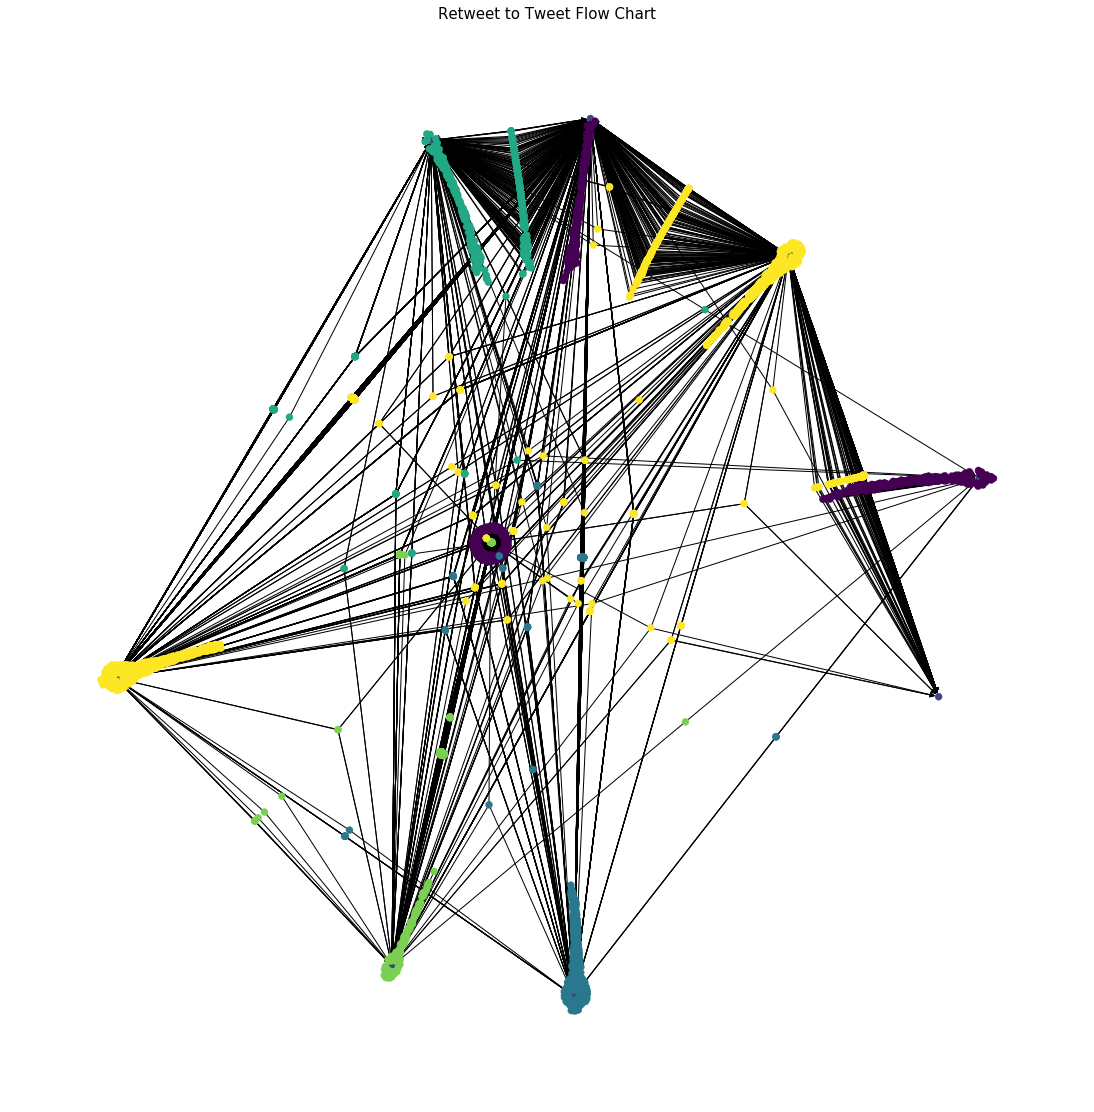

In [56]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 15))
nx.draw(network, edge_color ="black", linewidths=0.3, node_size=50, cmap=plt.get_cmap('viridis'),node_color=values)
plt.title('Retweet to Tweet Flow Chart', size=15)
plt.show();

In [57]:
df2.head()

,user,original_creator,tweet,degrees,value
1,LeftSideKrew,AAA,On Bloomberg 'Already Right Wing Racist Misog...,1,1.25
9,LeftSideKrew,AAA,Calls Out Billionaire Oligarchs Michael Bloom...,1,1.25
15,LeftSideKrew,AAA,and The Black Vote https://t.co/0H5nfUE7Vf #B...,1,1.25
18,DailybitOtruth,AAA,the #BernieSanders game. Name something that ...,1,1.25
19,LeftSideKrew,AAA,West Arrested in 2011 For Protesting Against ...,1,1.25


In [58]:
import pandas as pd
import numpy as np
import seaborn as sns

import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk

In [110]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)][0]

def preprocess(doc):
    result = []
    for word in doc:
        for token in gensim.utils.simple_preprocess(word):
            if token not in gensim.parsing.preprocessing.STOPWORDS:
                result.append(lemmatize_text(token))
    return result

def hashtagcancelled(s):
    return re.sub('\s#.*\s', ' ', s)


In [60]:
sw = nltk.corpus.stopwords.words('english')

In [119]:
sw.append('rt')

In [121]:
df['tweet'] = df['tweet'].apply(hashtagcancelled)
df['tweet_sw_p'] = df['tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (sw)])).astype(str).str.replace('[^\w\s]', '').str.lower()
df['tweet_pre'] = df['tweet_sw_p'].str.split(' ')
processed_docs = df['tweet_pre'].map(preprocess)
processed_docs[:10]

0                       [rt, fight_, okay, say, quest]
1    [medhi, hasan, bloomberg, right, wing, racist,...
2                   [rt, theleftiscoming, fact, physi]
3                                 [rt, vozable, exper]
4                       [rt, fight_, okay, say, quest]
5                   [rt, lostdiva, bring, debate, amp]
6        [rt, greenblacklogic, bernie, fan, ad, share]
7    [rt, thatgirl, linda, sarsour, campaigning, as...
8    [rt, theleftiscoming, fact, cong, attending, p...
9    [nina, turner, call, billionaire, oligarch, mi...
Name: tweet_pre, dtype: object

In [122]:
dictionary = gensim.corpora.Dictionary(processed_docs)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]



0 fight_
1 okay
2 quest
3 rt
4 say
5 billionaire
6 bloomberg
7 hasan
8 joebiden
9 medhi
10 misogynist


In [123]:
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.4895894635982908),
 (1, 0.5090507989033005),
 (2, 0.5181963190772404),
 (3, 0.4823297794706937)]


In [124]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=5, 
                                       id2word=dictionary, passes=2, workers=2)

for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))
    print()

Topic: 0 
Words: 0.049*"ewarren" + 0.031*"candidate" + 0.021*"medium" + 0.020*"ignored" + 0.020*"stopped" + 0.019*"frisk" + 0.019*"eventempered" + 0.019*"smarter" + 0.019*"incarcerated" + 0.019*"nonoligarch"

Topic: 1 
Words: 0.042*"people" + 0.025*"dig" + 0.024*"room" + 0.024*"farmer" + 0.024*"anybody" + 0.024*"teach" + 0.024*"hole" + 0.024*"offense" + 0.024*"intended" + 0.024*"process"

Topic: 2 
Words: 0.041*"amp" + 0.032*"time" + 0.031*"candidate" + 0.031*"sallydeal" + 0.027*"space" + 0.026*"mayawiley" + 0.026*"matchu" + 0.026*"record" + 0.024*"joebiden" + 0.024*"midterm"

Topic: 3 
Words: 0.038*"elizabethwarren" + 0.035*"nancyleegrahn" + 0.025*"physical" + 0.025*"result" + 0.025*"recent" + 0.025*"doctor" + 0.025*"released" + 0.025*"annual" + 0.025*"exam" + 0.025*"letter"

Topic: 4 
Words: 0.144*"sell" + 0.144*"mayawiley" + 0.037*"httpstco" + 0.026*"amp" + 0.022*"era" + 0.022*"millercrime" + 0.022*"silenced" + 0.016*"warren" + 0.014*"vote" + 0.014*"candidate"



In [125]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=3, id2word=dictionary, passes=2, workers=4)
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))
    print()

Topic: 0 Word: 0.041*"sell" + 0.038*"mayawiley" + 0.018*"bloomberg" + 0.017*"youcantbeatpete" + 0.017*"sallydeal" + 0.016*"focusing" + 0.015*"kpnationalist" + 0.014*"election" + 0.012*"let" + 0.012*"romney"

Topic: 1 Word: 0.022*"people" + 0.021*"teach" + 0.021*"anybody" + 0.021*"room" + 0.021*"intended" + 0.020*"dig" + 0.020*"process" + 0.020*"offense" + 0.020*"larryelder" + 0.020*"hole"

Topic: 2 Word: 0.024*"candidate" + 0.019*"httpstco" + 0.018*"bernie" + 0.018*"berniesanders" + 0.018*"joebiden" + 0.016*"midterm" + 0.016*"amp" + 0.015*"sallydeal" + 0.014*"endorse" + 0.014*"record"

